In [1]:
import os
import sys
sys.path.append("./..")
from utils import PROJECT_ROOT
from definitions import get_cell_phenotype_id
import numpy as np
from SoftWL import compute_cluster_centroids, merge_close_clusters
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [2]:
iteration = 2

In [22]:
# Retrive cluster data
FILE_NAMES = os.listdir(os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel", "Danenberg", "Cohort_1"))
X = []
Cluster_identities = []
for file_name in FILE_NAMES:
    x = np.load(os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel", "Danenberg", "Cohort_1", file_name, 'X' + str(iteration) + '.npy'))
    cluster_identities = np.load(os.path.join(PROJECT_ROOT, "Output", "b_Soft_WL_Kernel", "Danenberg", "Cohort_1", file_name, 'initial_cluster_X'+str(iteration)+'.npy'))
    X.append(x)
    Cluster_identities.append(cluster_identities)
X = np.concatenate(X, axis=0)
Cluster_identities = np.concatenate(Cluster_identities, axis=0)
Centroids = compute_cluster_centroids(X, Cluster_identities)

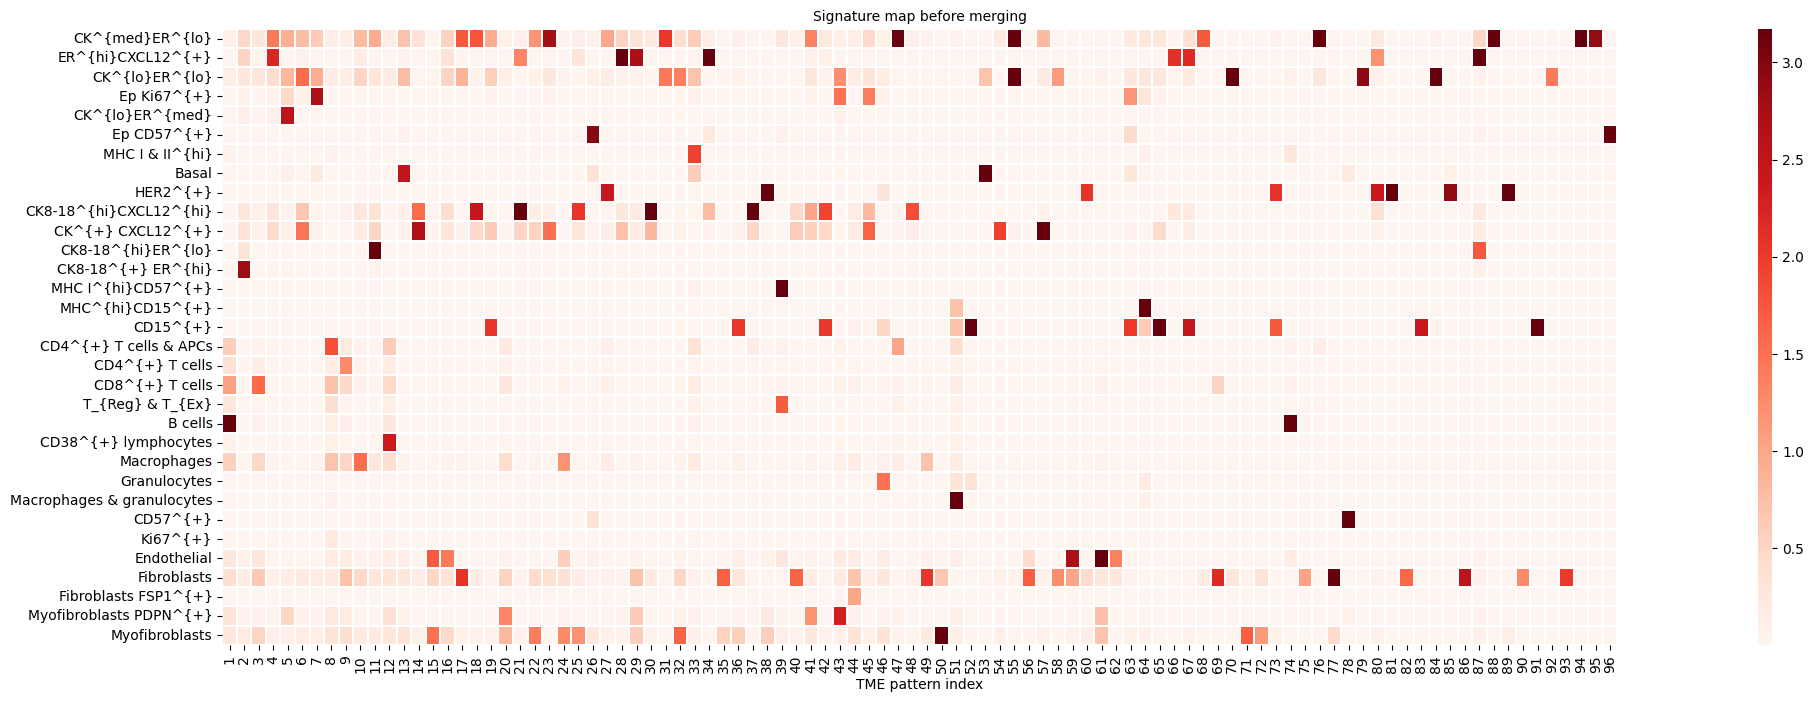

In [4]:
# Signature map before merging
Signature = Centroids.T
Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(20, 8),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Signature,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.005,
        edgecolor="black",
        vmax=np.percentile(Signature, 99),
        vmin=np.percentile(Signature, 5),
    )
ax.set_yticklabels(Cell_type_name_list, rotation=0, fontsize=10)
ax.set_xticklabels([i+1 for i in range(Signature.shape[1])], fontsize=10, rotation = 90)
ax.set_xlabel("TME pattern index", fontsize=10)
ax.set_title("Signature map before merging", fontsize=10)
plt.show()


In [35]:
# Umap before merging
from sklearn.manifold import TSNE
import umap.umap_ as umap

n_sample = 100000
indices_sampled = np.random.choice(X.shape[0], n_sample, replace=False)
X_sampled = X[indices_sampled]
Cluster_identities_sampled = Cluster_identities[indices_sampled]
reducer = umap.UMAP()
embedding = reducer.fit_transform((X_sampled-np.mean(X_sampled, axis=0))/np.std(X_sampled, axis=0))


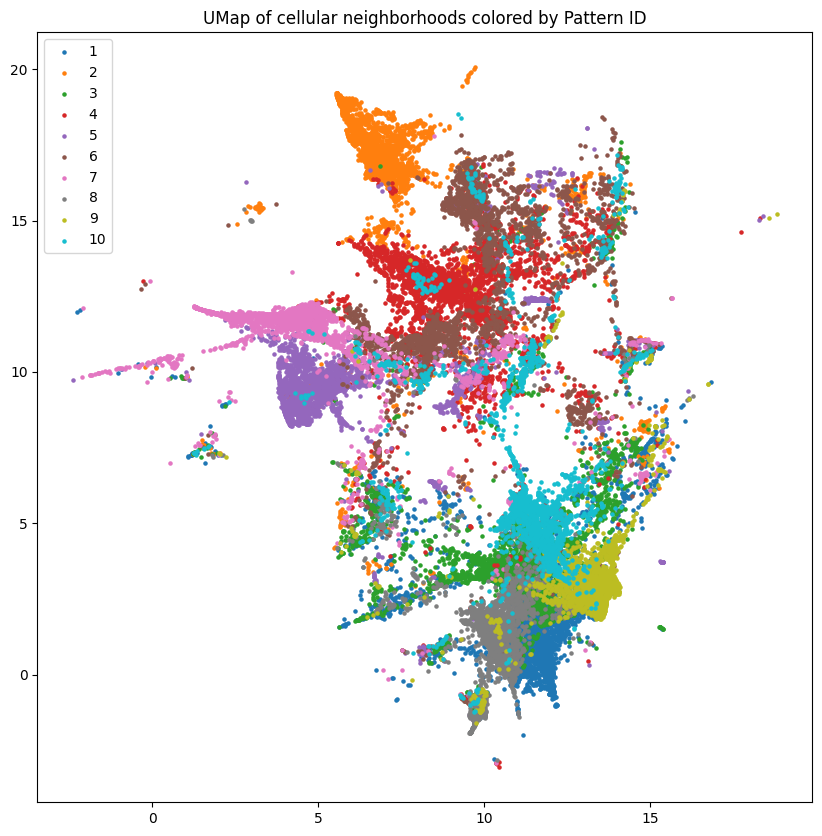

In [40]:
f, ax = plt.subplots(figsize = (10,10))
for i in range(10):
    ax.scatter(embedding[Cluster_identities_sampled == i,0], embedding[Cluster_identities_sampled == i,1], color = sns.color_palette('tab10')[i], s = 5, label = i+1)

ax.legend()
ax.set(title = 'UMap of cellular neighborhoods colored by Pattern ID')
f.show()

<AxesSubplot: >

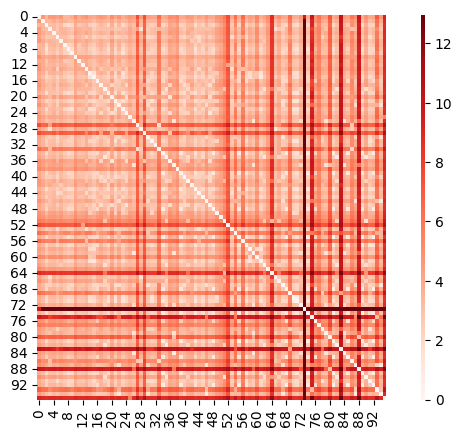

In [23]:
# Pirwise distance between centroids
pairwise_dist = pairwise_distances(Centroids)
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(5, 5),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        pairwise_dist,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="Reds",
        linewidth=0.0005,
        edgecolor="black",
        vmax=np.percentile(Centroids, 100),
        vmin=np.percentile(Centroids, 0),
    )

In [7]:
# Merge clusters
for merge_threshold_percentile in [10, 20, 30, 40, 50, 60, 70, 80, 90]:
    merge_threshold = np.percentile(pairwise_dist, merge_threshold_percentile)
    Cluster_identities_merged = merge_close_clusters(X, Cluster_identities, merge_threshold)
    print("Percentile = {}, Threshold = {}, Number of clusters after merged = {}".format(merge_threshold_percentile, merge_threshold, len(np.unique(Cluster_identities_merged))))

Percentile = 10, Threshold = 2.287374370034188, Number of clusters after merged = 45
Percentile = 20, Threshold = 2.8361942142348346, Number of clusters after merged = 36
Percentile = 30, Threshold = 3.2088496876348294, Number of clusters after merged = 31
Percentile = 40, Threshold = 3.5407682280537927, Number of clusters after merged = 27
Percentile = 50, Threshold = 3.924766664863042, Number of clusters after merged = 24
Percentile = 60, Threshold = 4.394010596932108, Number of clusters after merged = 18
Percentile = 70, Threshold = 5.234564250198647, Number of clusters after merged = 14
Percentile = 80, Threshold = 6.415240433184289, Number of clusters after merged = 12
Percentile = 90, Threshold = 8.610267454251405, Number of clusters after merged = 7


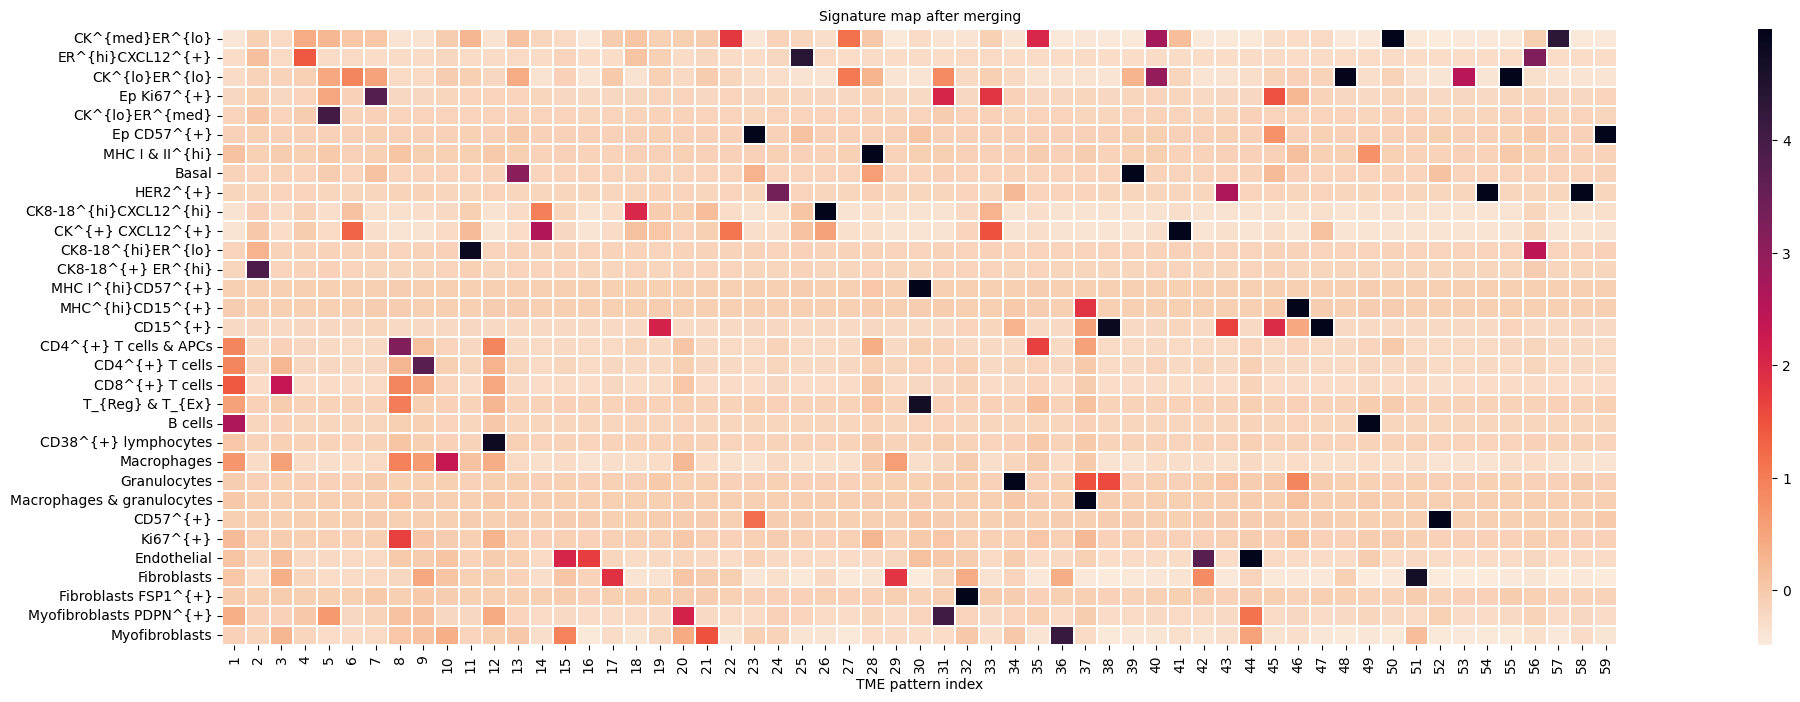

In [62]:

merge_threshold = 2
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
Cluster_identities_merged = merge_close_clusters(X, Cluster_identities, merge_threshold)
Centroids = compute_cluster_centroids(X, Cluster_identities_merged)



Signature = Centroids.T

Cell_type_name_list = list(get_cell_phenotype_id('Danenberg'))
f, (ax, cbar_ax) = plt.subplots(1,2,figsize=(20, 8),gridspec_kw= {"width_ratios": [20,0.2]} )
sns.heatmap(
        Signature,
        ax=ax,
        cbar_ax=cbar_ax,
        cmap="rocket_r",
        linewidth=0.005,
        edgecolor="black",
        vmax=np.percentile(Signature, 99),
        vmin=np.percentile(Signature, 0),
    )
ax.set_yticklabels(Cell_type_name_list, rotation=0, fontsize=10)
ax.set_xticklabels([i+1 for i in range(Signature.shape[1])], fontsize=10, rotation = 90)
ax.set_xlabel("TME pattern index", fontsize=10)
ax.set_title("Signature map after merging", fontsize=10)
plt.show()

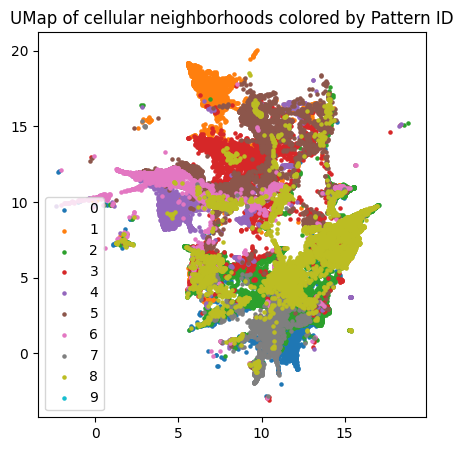

In [41]:
# Umap before merging
from sklearn.manifold import TSNE
import umap.umap_ as umap

Cluster_identities_merged_sampled = Cluster_identities_merged[indices_sampled]
f, ax = plt.subplots(figsize = (5,5))
for i in range(10):
    ax.scatter(embedding[Cluster_identities_merged_sampled == i,0], embedding[Cluster_identities_merged_sampled == i,1], s = 5, label = i)

ax.legend()
ax.set(title = 'UMap of cellular neighborhoods colored by Pattern ID')
f.show()

In [14]:
Centroids[54,:]

array([4.08596609e-02, 5.34019153e-03, 2.53342207e-02, 1.47152802e-02,
       9.98256129e-03, 4.10077966e-05, 3.39017910e-04, 5.21210173e-03,
       9.15969461e+00, 5.66424874e-03, 9.72313012e-03, 7.16889053e-08,
       3.25838020e-04, 2.61399769e-09, 1.07015550e-05, 1.67336995e-02,
       9.53972577e-03, 9.04846498e-03, 6.64636188e-03, 3.34296709e-03,
       1.69499258e-03, 4.75764653e-03, 1.07955102e-02, 1.38054720e-02,
       2.73246882e-03, 3.70153096e-06, 2.09822154e-04, 1.31526493e-02,
       3.79853977e-02, 7.78580976e-04, 4.74954574e-02, 1.34063818e-01])

In [15]:
pairwise_dist = pairwise_distances(Centroids)
pairwise_dist[51,54]

2.9687369888251496